# Gráficos Estatísticos com Seaborn

<a href=https://seaborn.pydata.org/examples/>Seaborn </a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
%matplotlib inline

In [2]:
sns.__version__

'0.11.1'

In [3]:
# Datasets importados junto com seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
# Carregando um dataset
iris = sns.load_dataset('iris')

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Contruindo Gráficos Estatísticos

/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

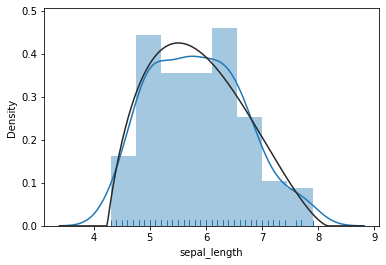

In [9]:
# histograma com estimativa de densidade de Kernel - Distribuição univariada
sns.distplot(iris.sepal_length, rug = True, fit = stats.gausshyper)

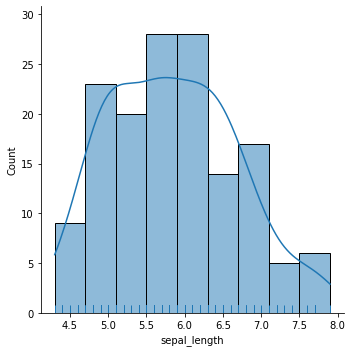

In [10]:
# Corrigindo a mensagem acima
sns.displot(iris.sepal_length, rug = True, kde = True)

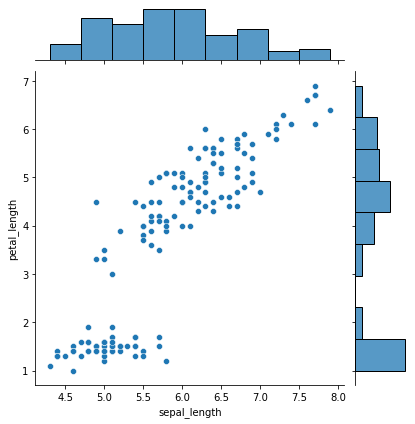

In [11]:
# Scatterplot - Distribuição bivariada
sns.jointplot(x = 'sepal_length', y = 'petal_length', data = iris)

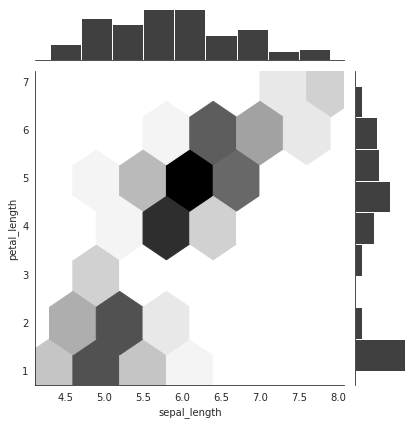

In [12]:
# Gráfico útil quando estiver trabalhando com grandes conjuntos de dados - Distribuição bivariada
with sns.axes_style('white'):
    sns.jointplot(x = 'sepal_length', y = 'petal_length', data = iris, kind = 'hex', color = 'k')

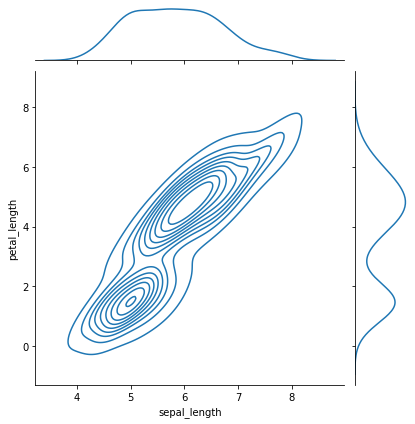

In [28]:
# Distribuição bivariada
sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = 'kde');

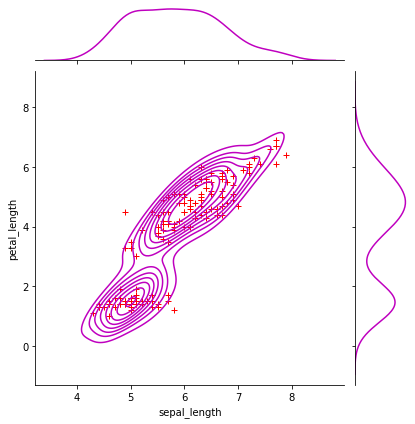

In [31]:
# Distribuição bivariada
g = sns.jointplot(x = 'sepal_length',
                 y = 'petal_length',
                 data = iris,
                 kind = 'kde',
                 color = 'm')

g.plot_joint(plt.scatter, c = 'r', s = 30, linewidth = 1, marker = '+')

g.ax_joint.collections[0].set_alpha(0)

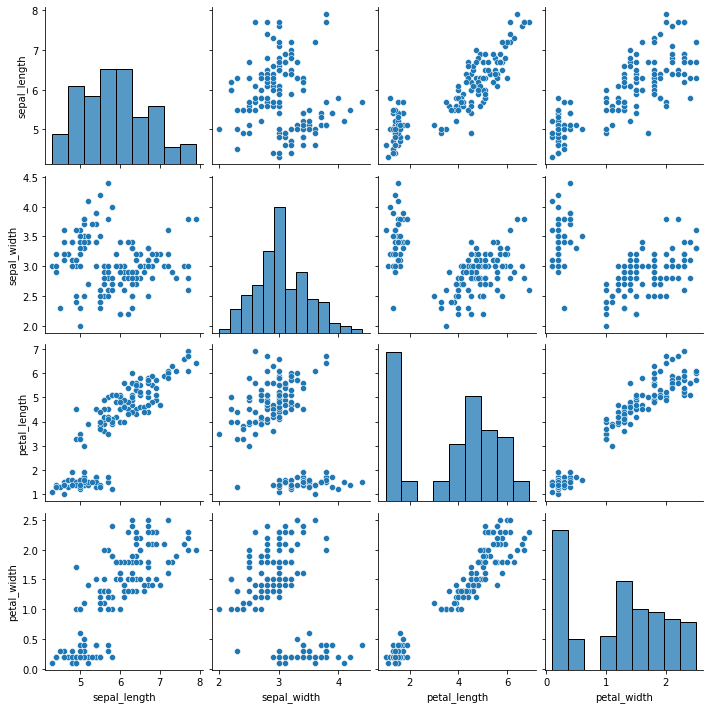

In [26]:
# Plot para distribuições bi-variadas
sns.pairplot(iris)

# Visualização de Relacionamento Linear

In [32]:
# Carregar o dataset tips
tips = sns.load_dataset('tips')

In [33]:
type(tips)

pandas.core.frame.DataFrame

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


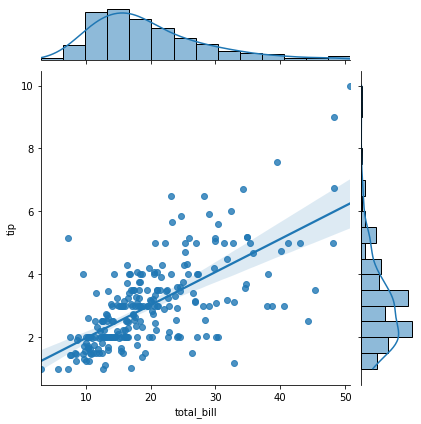

In [36]:
# Scatterplot com linha de regressão - Distribuição bivariada
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

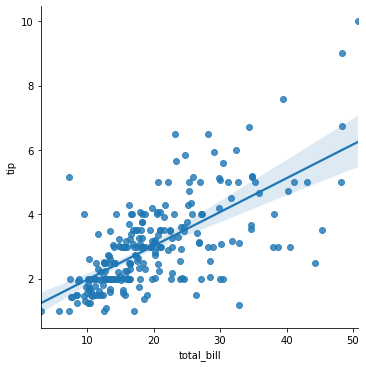

In [37]:
# Regressão linear (utiliza 95% de intervalo de confiança por padrão)
# tip - variável dependente
# total_bill - variável independente
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

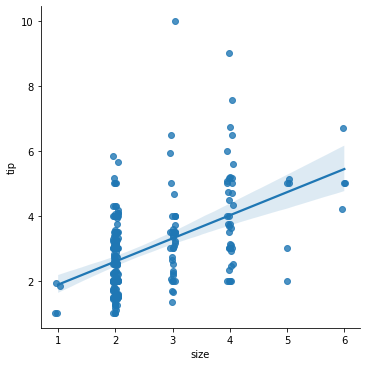

In [38]:
# Alterando a variável independente
sns.lmplot(x = 'size', y = 'tip', data = tips, x_jitter = .05)

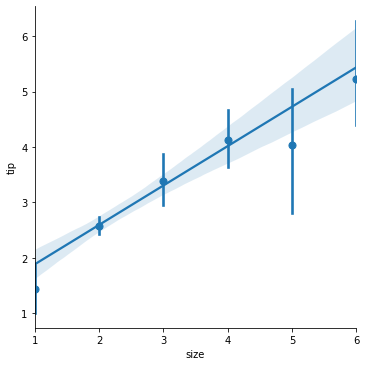

In [39]:
# Visualizando o efeito de diferetes tamanho de tips
sns.lmplot(x = 'size',
           y = 'tip',
           data = tips,
           x_estimator = np.mean)

In [40]:
# Carregando o datase anscombe
anscombe = sns.load_dataset('anscombe')

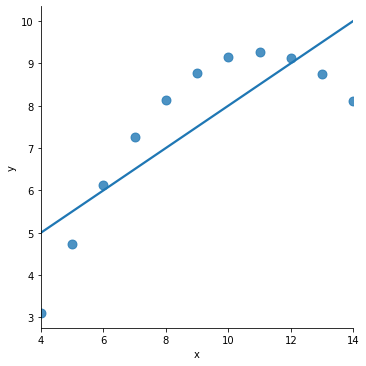

In [42]:
# Relacionamento não linear
sns.lmplot(x = 'x', 
           y = 'y',
           data = anscombe.query("dataset == 'II'"),
           ci = None,
           scatter_kws = {'s':80}
          )

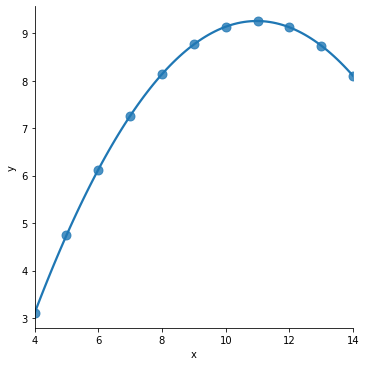

In [43]:
# Podemos ajustar os parâmetros para se adequarem a curva
sns.lmplot(x = 'x',
          y = 'y',
          data = anscombe.query("dataset == 'II'"),
          order = 2,
          ci = None,
          scatter_kws = {'s':80})

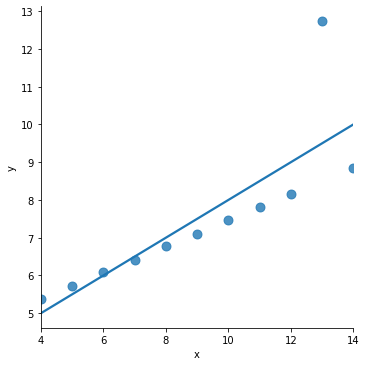

In [44]:
# Visualizando outliers
sns.lmplot(x = 'x',
          y = 'y',
          data = anscombe.query("dataset == 'III'"),
          ci = None,
          scatter_kws = {'s':80})

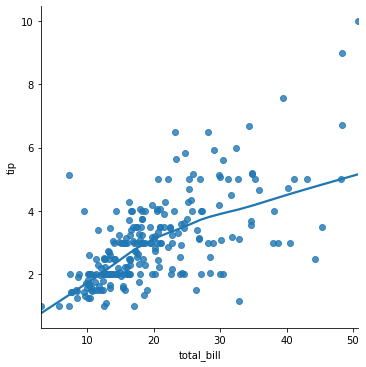

In [52]:
# Usando o lowess smoother para variáveis com relacionamento não linear.
sns.lmplot(x = 'total_bill',
          y = 'tip',
          data = tips,
          lowess = True)

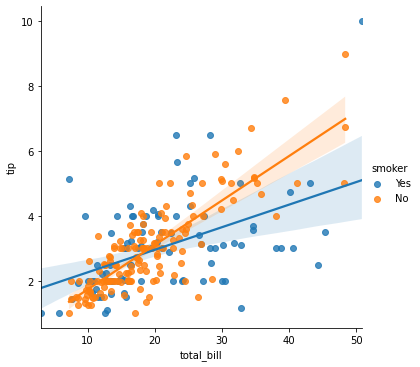

In [45]:
# Usando mais de duas variáveis
sns.lmplot(x = 'total_bill',
          y = 'tip',
          hue = 'smoker',
          data = tips)

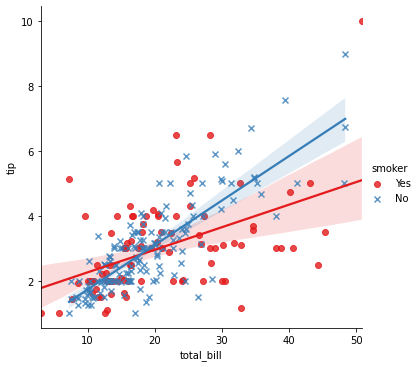

In [48]:
# Alterando a configuração do gráfico
sns.lmplot(x = 'total_bill',
          y = 'tip',
          hue = 'smoker',
          data = tips,
          markers = ['o', 'x'],
          palette = 'Set1'
          )

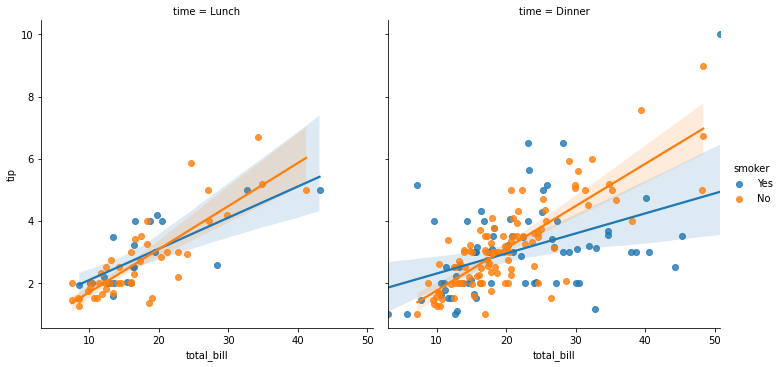

In [50]:
# Dividindo a área do desenho
sns.lmplot(x = 'total_bill',
           y = 'tip',
           hue = 'smoker',
           col = 'time',
           data = tips,          
          )

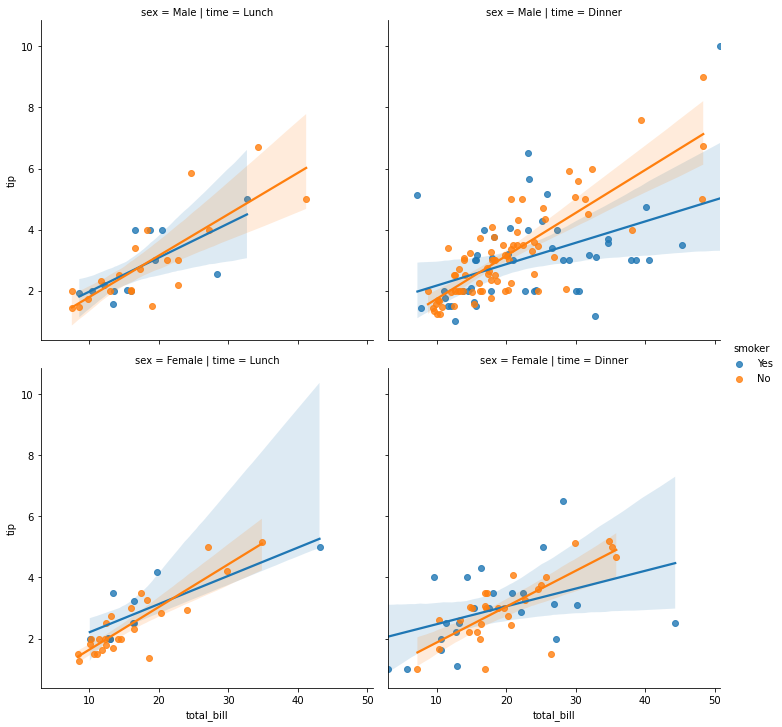

In [51]:
# Dividindo a área do desenho
sns.lmplot(x = 'total_bill',
           y = 'tip',
           hue = 'smoker',
           col = 'time',
           data = tips,          
           row = 'sex'
          )

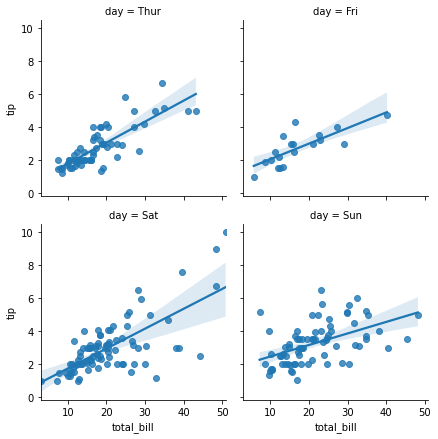

In [56]:
# Dividindo a área do desenho
sns.lmplot(x = 'total_bill',
           y = 'tip',
           col = 'day',
           data = tips,          
           col_wrap = 2,
           height = 3
          )

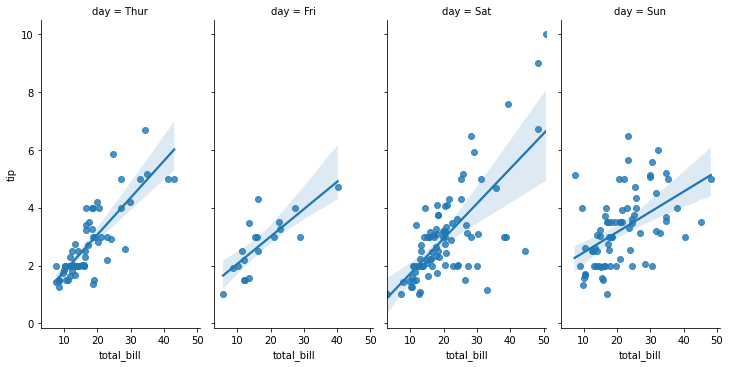

In [57]:
# Dividindo a área do desenho
sns.lmplot(x = 'total_bill',
           y = 'tip',
           col = 'day',
           data = tips,          
           aspect = .5
          )

# Gráficos para Variáveis Categóricas

<AxesSubplot:xlabel='day', ylabel='total_bill'>

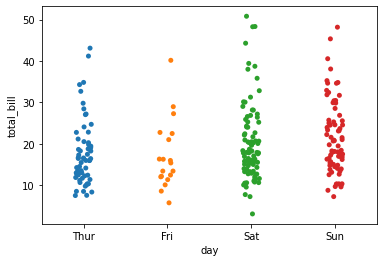

In [58]:
# stripplot
sns.stripplot(x = 'day',
              y = 'total_bill',
              data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

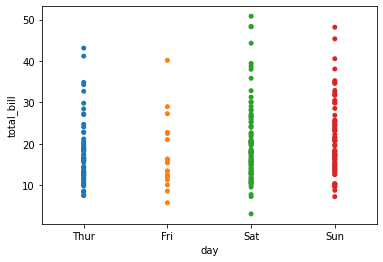

In [60]:
# stripplot
sns.stripplot(x = 'day',
              y = 'total_bill',
             data = tips,
             jitter = False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

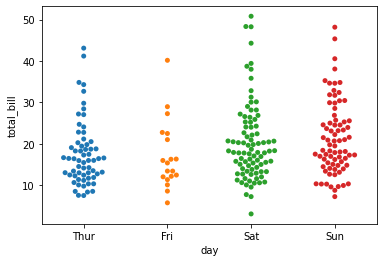

In [61]:
# swarmplot - Evitando overlap dos pontos
sns.swarmplot(x = 'day',
              y = 'total_bill',
              data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

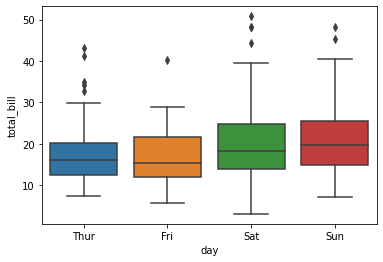

In [62]:
# Boxplot
sns.boxplot(x = 'day',
            y = 'total_bill',
            data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

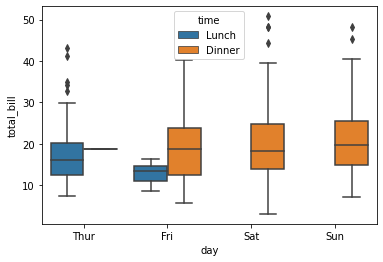

In [63]:
# BoxPlot
sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'time',
            data = tips)

<AxesSubplot:>

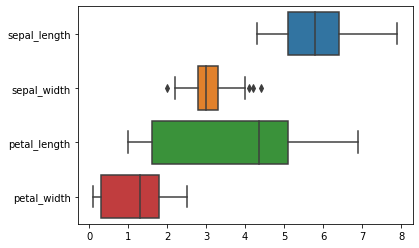

In [65]:
# Boxplot
sns.boxplot(orient = 'h',
             data = iris)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

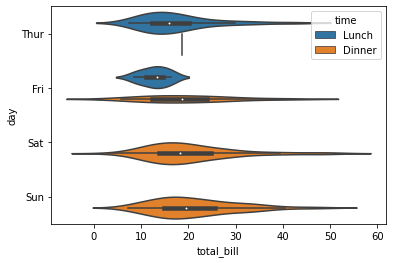

In [66]:
# Violinplot
sns.violinplot(x = 'total_bill',
               y = 'day',
               hue = 'time',
               data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

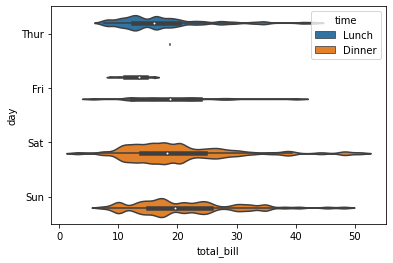

In [67]:
# Violinplot
sns.violinplot(x = 'total_bill',
               y = 'day',
               hue = 'time',
               data = tips,
               bw = .1,
               scale = 'count',
               scale_hue = False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

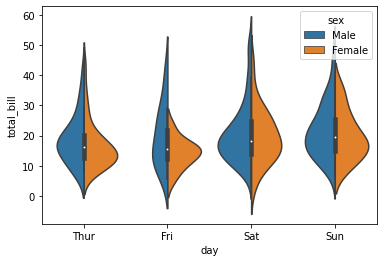

In [68]:
# Violinplot
sns.violinplot(x = 'day',
               y = 'total_bill',
               hue = 'sex',
               split = True,
               data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

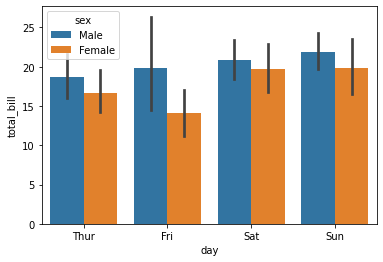

In [69]:
# Barplot
sns.barplot(y = 'total_bill',
            x = 'day',
            hue = 'sex',
            data = tips)

<AxesSubplot:xlabel='day', ylabel='count'>

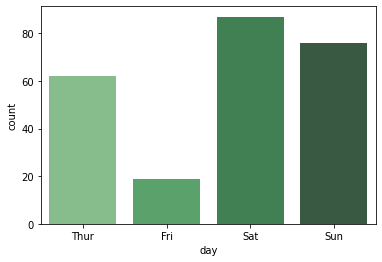

In [71]:
# Countplot
sns.countplot(x = 'day',
              palette = 'Greens_d',
              data = tips)

<AxesSubplot:xlabel='count', ylabel='day'>

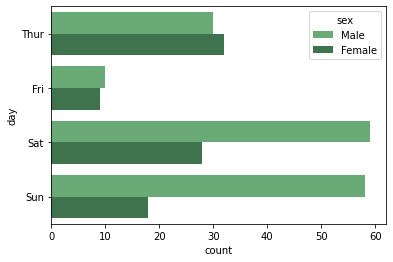

In [73]:
# Countplot
sns.countplot(y = 'day',
              palette = 'Greens_d',
              hue = 'sex',
              data = tips)

<AxesSubplot:xlabel='count', ylabel='day'>

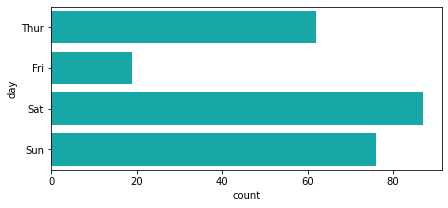

In [75]:
# Countplot
f, ax = plt.subplots(figsize = (7, 3))
sns.countplot(y = 'day',
              color = 'c',
              data = tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

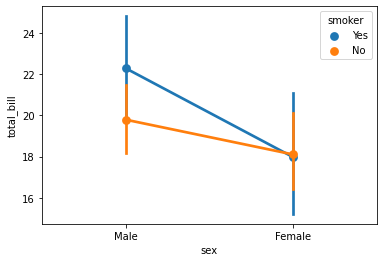

In [76]:
# Pointplot
sns.pointplot(x = 'sex',
              y = 'total_bill',
              hue = 'smoker',
              data = tips)

/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


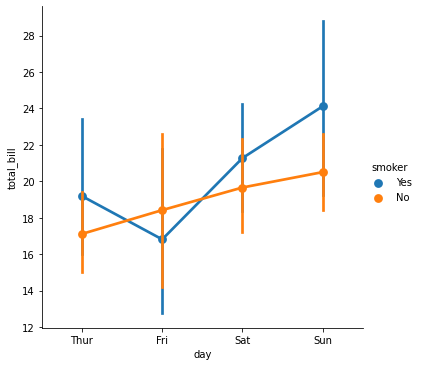

In [77]:
# Factorplot
sns.factorplot(x = 'day',
               y = 'total_bill',
               hue = 'smoker',
               data = tips)

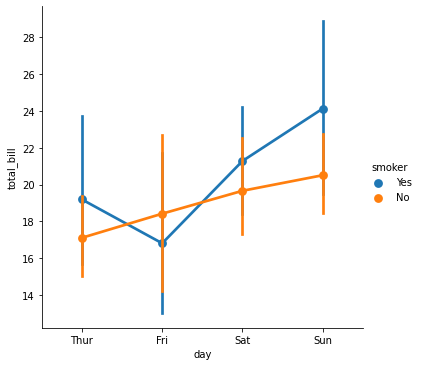

In [79]:
# Corrigindo a linha anterior
# catrplot
sns.catplot(x = 'day',
               y = 'total_bill',
               hue = 'smoker',
               data = tips,
            kind='point')

# Visualizando DataFrames Pandas com Seaborn

In [80]:
import random
import pandas as pd

In [82]:
df = pd.DataFrame()

In [83]:
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [84]:
df.head()

,x,y
0,11,27
1,49,41
2,47,62
3,30,34
4,85,58


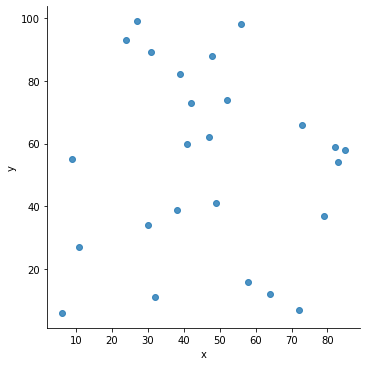

In [86]:
# Scaterplot
sns.lmplot(x = 'x', 
           y = 'y', 
           data = df, 
           fit_reg = False)

<AxesSubplot:xlabel='y', ylabel='Density'>

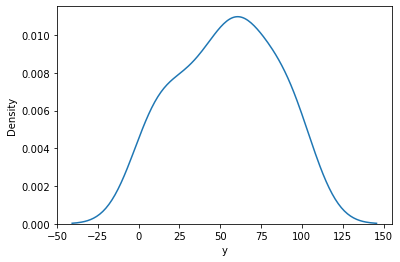

In [87]:
# Density Plot
sns.kdeplot(df.y)

/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

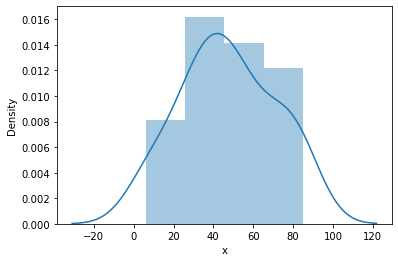

In [88]:
# Distplot
sns.distplot(df.x)

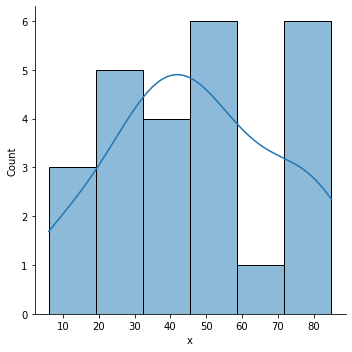

In [90]:
# Corrigindo a linha anterior
sns.displot(df.x, kde = True)

<AxesSubplot:xlabel='x'>

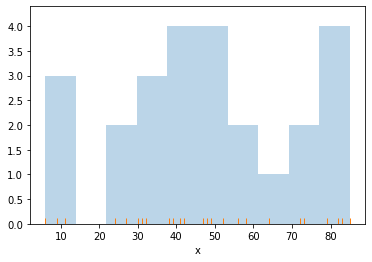

In [91]:
# Histograma
plt.hist(df.x, alpha = .3)
sns.rugplot(df.x)

/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

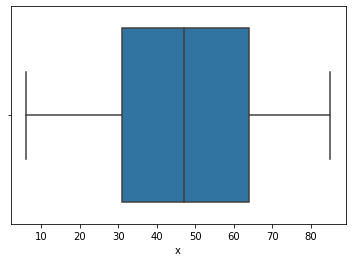

In [95]:
# BoxPlot
sns.boxplot(df.x)

/home/carlos-vitorino/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

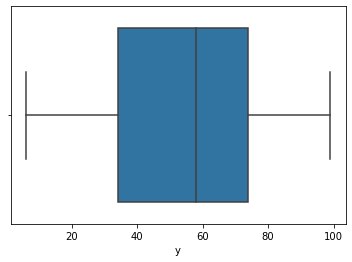

In [96]:
# BoxPlot
sns.boxplot(df.y)

<AxesSubplot:xlabel='x'>

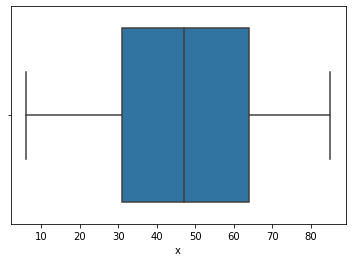

In [97]:
# BoxPlot
sns.boxplot(data = df, x = 'x')

<AxesSubplot:>

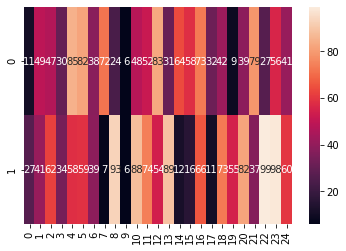

In [99]:
# HeatMap
sns.heatmap([df.x, df.y],
           annot = True,
           fmt = 'd')

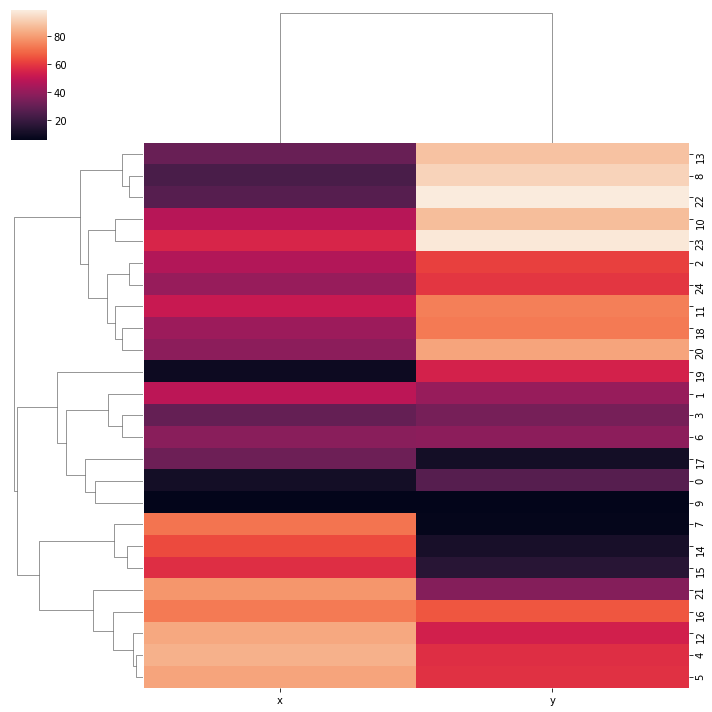

In [101]:
# Clustermap
sns.clustermap(df)

# FIM